Importing Important Libraries

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Loading the dataset

In [2]:
df = pd.read_csv("delivery_time.csv")
df.head(2)

,Delivery Time,Sorting Time
0,21.0,10
1,13.5,4


# Question - Predict delivery time using sorting time?

Pre Processing Technique

In [3]:
#Shape of the data 
df.shape

(21, 2)

In [4]:
# Getting the data type information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


Handling the missing Values

In [5]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

There are no missing values and data types are correct.

Finding the Coorelation.

In [6]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


Data Visualization

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

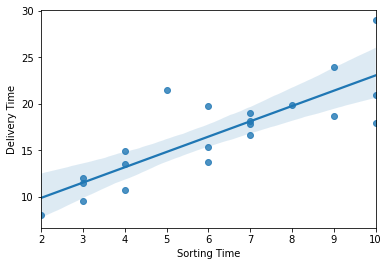

In [7]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])

By seeing above, we can conclude that the Sorting_time is having best relationsip with the Delivery Time.

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

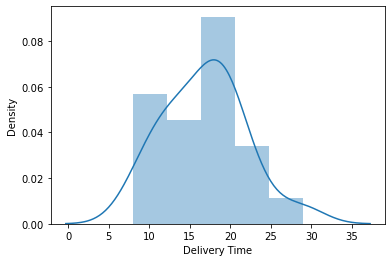

In [8]:
sns.distplot(df['Delivery Time'])


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

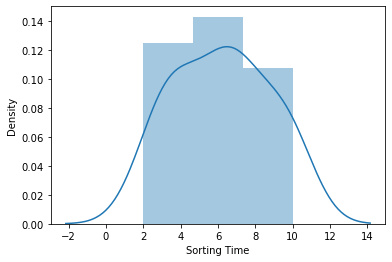

In [9]:
sns.distplot(df['Sorting Time'])


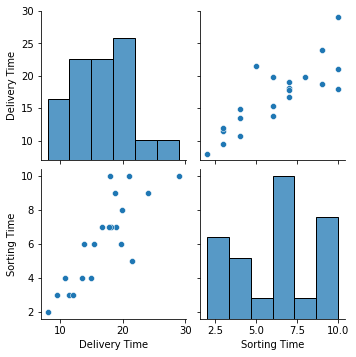

In [10]:
sns.pairplot(df)

Machine Learning

In [11]:
X = df[["Sorting Time"]]
Y = df[["Delivery Time"]] 

## Dividing data into Training and Testing Set.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Simple Regression Model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

Now training the above model with training set data.

In [16]:
model.fit(x_train,y_train)

LinearRegression()

# Predict the training set.

In [17]:
y_pred = model.predict(x_test)

In [18]:
y_pred = [val[0] for val in y_pred]
y_pred

[24.924743499648628,
 18.852009838369643,
 12.779276177090656,
 12.779276177090656,
 24.924743499648628]

## Compare The Training Set Answers With Predicted Answer

In [19]:
df_pred = pd.DataFrame({'Actual Answer': y_test["Delivery Time"].values, "Predicted Answer":y_pred})
df_pred

,Actual Answer,Predicted Answer
0,21.00,24.924743
1,18.11,18.852010
2,14.88,12.779276
3,13.50,12.779276
4,17.90,24.924743


## Finding The Errors and Efficency of our Model

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score :          ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.9025888966971176
Mean Squared Error: 14.046738956635016
Root Mean Squared Error: 3.7478979383962705
R^2 Score :           -1.0207599586367362


## Logrithm Transformation

y= a+ b* log(x)

In [26]:
#Input Dataset or Predictor

X_log = np.log(df["Sorting Time"].values.reshape(-1,1))

#Output Dataset or Target 

Y_log = df["Delivery Time"].values.reshape(-1,1)

In [27]:
X_train_log, X_test_log, Y_train_log, Y_test_log = train_test_split(X_log, Y_log, test_size=0.2, random_state=42)

In [28]:
y_pred_log = LinearRegression()
y_pred_log.fit(X_train_log, Y_train_log)

LinearRegression()

In [31]:
Y_pred_log = y_pred_log.predict(X_test_log)
Y_pred_log = [val[0] for val in Y_pred_log]

In [33]:
df1_pred = pd.DataFrame({"Actual": Y_test_log.flatten(), "Predict" : Y_pred_log})
df1_pred

,Actual,Predict
0,21.00,22.927130
1,18.11,19.326312
2,14.88,13.676702
3,13.50,13.676702
4,17.90,22.927130


In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_log, Y_pred_log))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_log, Y_pred_log) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_log, Y_pred_log)))
print("R^2 Score :          ", metrics.r2_score(Y_test_log, Y_pred_log))

Mean Absolute Error: 1.910114526185978
Mean Squared Error: 6.388886730349971
Root Mean Squared Error: 2.5276247210276233
R^2 Score :           0.08089653229737481


## Exponential Transformation Model

log(Y) =α + βX + ε

In [35]:
#Input Dataset or Predictor

X_e_log = df["Sorting Time"].values.reshape(-1,1)

#Output Dataset or Target 

Y_e_log = np.log(df["Delivery Time"].values.reshape(-1,1))

In [36]:
X_train_exp, X_test_exp, Y_train_exp, Y_test_exp = train_test_split(X_e_log, Y_e_log, test_size=0.2, random_state= 42)

In [37]:
y_pred_e_log = LinearRegression()
y_pred_e_log.fit(X_train_exp, Y_train_exp)

LinearRegression()

In [38]:
Y_pred_e_log = y_pred_e_log.predict(X_test_log)
Y_pred_e_log = [val[0] for val in Y_pred_e_log]

In [39]:
df1_pred = pd.DataFrame({"Actual": Y_test_log.flatten(), "Predict" : Y_pred_e_log})
df1_pred

,Actual,Predict
0,21.00,2.289235
1,18.11,2.243152
2,14.88,2.170848
3,13.50,2.170848
4,17.90,2.289235


In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_log, Y_pred_e_log))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_log, Y_pred_e_log) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_log, Y_pred_e_log)))
print("R^2 Score :          ", metrics.r2_score(Y_test_log, Y_pred_e_log))

Mean Absolute Error: 14.845336191195738
Mean Squared Error: 227.0835545089646
Root Mean Squared Error: 15.069291771976697
R^2 Score :           -31.668176979245736


# Quadratic Transformation Model

In [43]:
df["Sqr_Sorting_time"] = df.apply(lambda row : row["Sorting Time"]**2, axis = 1)
df

,Delivery Time,Sorting Time,Sqr_Sorting_time
0,21.00,10,100.0
1,13.50,4,16.0
2,19.75,6,36.0
3,24.00,9,81.0
4,29.00,10,100.0
5,15.35,6,36.0
6,19.00,7,49.0
7,9.50,3,9.0
8,17.90,10,100.0
9,18.75,9,81.0


In [44]:
X_q = df.iloc[:,df.columns != 'Sorting Time']
Y_q = df.iloc[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X_q, Y_q, test_size=0.2, random_state= 42)
print(Y_test)


0     10
17     7
15     4
1      4
8     10
Name: Sorting Time, dtype: int64


In [45]:
model = Lidf_qm = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_q})nearRegression()
model.fit(X_train, Y_train)df_qm.head()

LinearRegression()

In [47]:
y_pred_q = model.predict(X_test)
y_pred

[24.924743499648628,
 18.852009838369643,
 12.779276177090656,
 12.779276177090656,
 24.924743499648628]

In [48]:
df_qm = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_q})
df_qm.head()

,Actual,Predicted
0,10,10.577669
17,7,6.609142
15,4,3.991555
1,4,3.941109
8,10,10.464347


In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_q))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_q) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_q)))
print("R^2 Score :          ", metrics.r2_score(Y_test, y_pred_q))

Mean Absolute Error: 0.30004207123528503
Mean Squared Error: 0.14112588204302062
Root Mean Squared Error: 0.3756672490955535
R^2 Score :           0.9803991830495805


# Conclusion

We have found that while transform the model, got various values for MAE, RMSE, MSE and R2 Values. Summery of the following Models